### Step 1: Understand the dataset 

In [126]:
import pandas as pd
import numpy as np
df = pd.read_csv('HW1 clv_transactions.csv')
df

,TransactionID,TransactionDate,CustomerID,Amount
0,1,9/4/2012,1,20.26
1,2,5/15/2012,2,10.87
2,3,5/23/2014,2,2.21
3,4,10/24/2014,2,10.48
4,5,10/13/2012,2,3.94
...,...,...,...,...
4181,4182,6/23/2013,1000,3.86
4182,4183,8/7/2011,1000,4.00
4183,4184,10/7/2012,1000,18.37
4184,4185,1/9/2014,1000,3.45


1. Are there any missing values in the dataset?  
A: No.

In [127]:
df.isna().sum() 

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

2. What is the range of dates in the dataset?  
A: 2010-01-04 to 2015-12-31

In [128]:
import datetime as dt
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
date_range = str(df['TransactionDate'].dt.date.min()) + ' to ' +str(df['TransactionDate'].dt.date.max())
print(date_range)

2010-01-04 to 2015-12-31


3. How many unique customers are there in the dataset?  
A:1000

In [129]:
df['CustomerID'].nunique()

1000

4. Profile the data to give the standard descriptive statistics for the Amount field. What is
the min, max, variance, and standard deviations?  
min: -1.000000  
max: 2033.000000  
variance: 1499.541111  
standard deviations: 38.723909

In [130]:
df['Amount'].describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [131]:
df['Amount'].var()

1499.5411107517464

5. Do transaction amounts in general increase over time (perhaps due to inflation)?  
A: No, the correlation between Year and Amount is -0.02. There's no correlation.  
The transaction amounts in general doesn't increase over time.

In [132]:
#add "Year" of the transaction
df['Year'] = pd.DatetimeIndex(df['TransactionDate']).year 
df['Year']

0       2012
1       2012
2       2014
3       2014
4       2012
        ... 
4181    2013
4182    2011
4183    2012
4184    2014
4185    2011
Name: Year, Length: 4186, dtype: int64

In [133]:
df['Year'].corr(df['Amount'])

-0.020998259423247758

### Step 2: Explore the dataset

1. Are there any outliers?  
A: Yes, it's more obvious in the scatter plot.

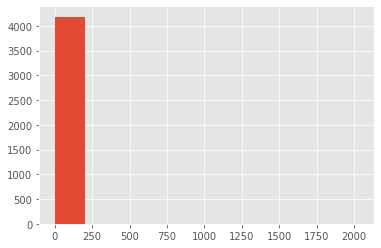

In [134]:
import matplotlib.pyplot as plt
#original amount
x = df['TransactionDate']
y = df['Amount']
#plot histogram
plt.hist(y)
plt.show()

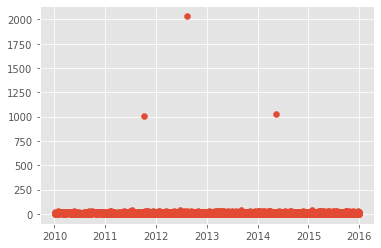

In [135]:
# more obvious in scatter
#plot scatter of amount over time
plt.scatter(x,y)
plt.show()

2. If so how would you treat them?  
A: I'll find the data range from the lower bound(1st quartile-1.5*IQR) to the upper bound(3rd quartile+1.5*IQR), and then
delete the data out of this range.
Also, I assume there's no transaction is negative, so I'll also delete the negative data point in the amount.

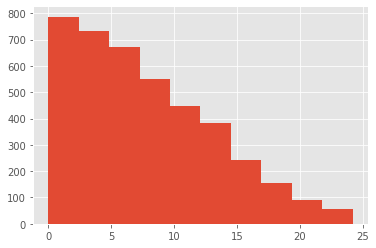

In [136]:
#remove outlier first
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lowbar  = q1-1.5*iqr
highbar = q3+1.5*iqr
#create new dataframe df_outlier without outlier
df_outlier = df.loc[(df['Amount'] > lowbar) & (df['Amount'] < highbar)]
# assume transaction should be positive, delete amount data lower than 0
df_outlier = df_outlier.loc[(df['Amount'] > 0)]
x = df_outlier['TransactionDate']
y = df_outlier['Amount']
#plot histogram
plt.hist(y)
plt.show()

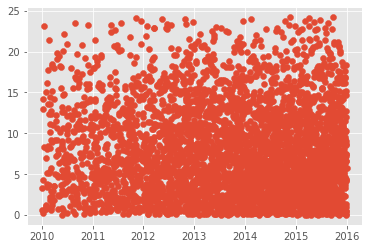

In [137]:
#plot scatter of amount over time
plt.scatter(x,y)
plt.show()

In [138]:
df_outlier['Amount'].describe()

count    4119.000000
mean        7.770311
std         5.522822
min         0.010000
25%         3.270000
50%         6.750000
75%        11.390000
max        24.200000
Name: Amount, dtype: float64

### Step 3:  Determine origin year of customers

In [139]:
#assign the "OriginalYear" as different froup to all customers
df_outlier['OriginalYear'] = df_outlier.groupby('CustomerID')['Year'].transform('min') 
df_outlier

,TransactionID,TransactionDate,CustomerID,Amount,Year,OriginalYear
0,1,2012-09-04,1,20.26,2012,2012
1,2,2012-05-15,2,10.87,2012,2012
2,3,2014-05-23,2,2.21,2014,2012
3,4,2014-10-24,2,10.48,2014,2012
4,5,2012-10-13,2,3.94,2012,2012
...,...,...,...,...,...,...
4181,4182,2013-06-23,1000,3.86,2013,2010
4182,4183,2011-08-07,1000,4.00,2011,2010
4183,4184,2012-10-07,1000,18.37,2012,2010
4184,4185,2014-01-09,1000,3.45,2014,2010


### Step 4: Calculate cumulative transaction amounts 

In [140]:
#cumulative transaction amounts
#groupby "OriginalYear"
gp = df_outlier.groupby('OriginalYear')
#2010
gp_10 = gp.get_group(2010)
#2011
gp_11 = gp.get_group(2011)
#2012
gp_12 = gp.get_group(2012)
#2013
gp_13 = gp.get_group(2013)
#2014
gp_14 = gp.get_group(2014)
#2015
gp_15 = gp.get_group(2015)

In [141]:
#group 2010
gp_10_12 = gp_10.loc[(gp_10['Year'] <= 2010), 'Amount'].sum()
gp_10_24 = gp_10.loc[(gp_10['Year'] <= 2011), 'Amount'].sum()
gp_10_36 = gp_10.loc[(gp_10['Year'] <= 2012), 'Amount'].sum()
gp_10_48 = gp_10.loc[(gp_10['Year'] <= 2013), 'Amount'].sum()
gp_10_60 = gp_10.loc[(gp_10['Year'] <= 2014), 'Amount'].sum()
gp_10_72 = gp_10.loc[(gp_10['Year'] <= 2015), 'Amount'].sum()
#group 2011
gp_11_12 = gp_11.loc[(gp_11['Year'] <= 2011), 'Amount'].sum()
gp_11_24 = gp_11.loc[(gp_11['Year'] <= 2012), 'Amount'].sum()
gp_11_36 = gp_11.loc[(gp_11['Year'] <= 2013), 'Amount'].sum()
gp_11_48 = gp_11.loc[(gp_11['Year'] <= 2014), 'Amount'].sum()
gp_11_60 = gp_11.loc[(gp_11['Year'] <= 2015), 'Amount'].sum()
#group 2012
gp_12_12 = gp_12.loc[(gp_12['Year'] <= 2012), 'Amount'].sum()
gp_12_24 = gp_12.loc[(gp_12['Year'] <= 2013), 'Amount'].sum()
gp_12_36 = gp_12.loc[(gp_12['Year'] <= 2014), 'Amount'].sum()
gp_12_48 = gp_12.loc[(gp_12['Year'] <= 2015), 'Amount'].sum()
#group 2013
gp_13_12 = gp_13.loc[(gp_13['Year'] <= 2013), 'Amount'].sum()
gp_13_24 = gp_13.loc[(gp_13['Year'] <= 2014), 'Amount'].sum()
gp_13_36 = gp_13.loc[(gp_13['Year'] <= 2015), 'Amount'].sum()
#group 2014
gp_14_12 = gp_14.loc[(gp_14['Year'] <= 2014), 'Amount'].sum()
gp_14_24 = gp_14.loc[(gp_14['Year'] <= 2015), 'Amount'].sum()
#group 2015
gp_15_12 = gp_15.loc[(gp_15['Year'] <= 2015), 'Amount'].sum()

In [142]:
#result of cumulative transaction amounts
ctAmount = {'12'  : [gp_10_12, gp_11_12, gp_12_12,gp_13_12, round(gp_14_12,2), gp_15_12],
        '24'  : [gp_10_24, gp_11_24, round(gp_12_24,2), gp_13_24, round(gp_14_24,2),np.NaN],
        '36'  : [round(gp_10_36,2), gp_11_36, gp_12_36,gp_13_36, np.NaN, np.NaN],
        '48'  : [gp_10_48, gp_11_48,gp_12_48, np.NaN, np.NaN, np.NaN],
        '60'  : [gp_10_60, round(gp_11_60,2), np.NaN, np.NaN, np.NaN, np.NaN],
        '72'  : [gp_10_72, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
        }
df_ctAmount = pd.DataFrame(ctAmount)
df_ctAmount.set_axis(['2010-01-01 - 2010-12-31', '2011-01-01 - 2011-12-31', '2012-01-01 - 2012-12-31', '2013-01-01 - 2013-12-31', '2014-01-01 - 2014-12-31', '2015-01-01 - 2015-12-31'], inplace=True)
df_ctAmount.columns.name = 'Origin'
#new dataframe for printing, keep original one for calculation
df_ctAmount_print = df_ctAmount.replace(np.NaN,"")
df_ctAmount_print

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,2153.88,3453.24,5083.29,6358.37,7629.76,8613.55
2011-01-01 - 2011-12-31,2061.35,3538.94,5074.2,6239.58,7330.47,
2012-01-01 - 2012-12-31,2047.64,3646.1,4909.9,6109.66,,
2013-01-01 - 2013-12-31,2074.20,3450.71,4989.08,,,
2014-01-01 - 2014-12-31,1807.95,3204.55,,,,
2015-01-01 - 2015-12-31,1758.60,,,,,


#### Answer:

|Origin|12|24|36|48|60|72|
|---|---|---|---|---|---|---|
|2010-01-01 - 2010-12-31|2153\.88|3453\.24|5083\.29|6358\.37|7629\.76|8613\.55|
|2011-01-01 - 2011-12-31|2061\.35|3537\.94|5073\.2|6238\.58|7329\.47||
|2012-01-01 - 2012-12-31|2047\.64|3646\.1|4909\.9|6109\.66|||
|2013-01-01 - 2013-12-31|2074\.2|3449\.71|4988\.08||||
|2014-01-01 - 2014-12-31|1807\.95|3204\.55|||||
|2015-01-01 - 2015-12-31|1758\.6||||||

### Step 5: Calculate number of new customers

In [143]:
#calculate new customer per year
gp_10_customer= gp_10['CustomerID'].nunique()
gp_11_customer= gp_11['CustomerID'].nunique()
gp_12_customer= gp_12['CustomerID'].nunique()
gp_13_customer= gp_13['CustomerID'].nunique()
gp_14_customer= gp_14['CustomerID'].nunique()
gp_15_customer= gp_15['CustomerID'].nunique()

In [144]:
#result of number of new customers
newCustomer = {'12'  : [gp_10_customer, gp_11_customer, gp_12_customer, gp_13_customer, gp_14_customer, gp_15_customer],
        '24'  : [gp_10_customer, gp_11_customer, gp_12_customer, gp_13_customer, gp_14_customer, np.NaN],
        '36'  : [gp_10_customer, gp_11_customer, gp_12_customer, gp_13_customer, np.NaN, np.NaN],
        '48'  : [gp_10_customer, gp_11_customer, gp_12_customer, np.NaN, np.NaN, np.NaN],
        '60'  : [gp_10_customer, gp_11_customer,  np.NaN,  np.NaN,  np.NaN, np.NaN],
        '72'  : [gp_10_customer,  np.NaN,  np.NaN,  np.NaN,  np.NaN, np.NaN]
        }
df_newCustomer = pd.DataFrame(newCustomer)
df_newCustomer.set_axis(['2010-01-01 - 2010-12-31', '2011-01-01 - 2011-12-31', '2012-01-01 - 2012-12-31', '2013-01-01 - 2013-12-31', '2014-01-01 - 2014-12-31', '2015-01-01 - 2015-12-31'], inplace=True)
df_newCustomer.columns.name = 'Origin'
#new dataframe for printing, keep original one for calculation
df_newCustomer_print = df_newCustomer.replace(np.NaN,"")
df_newCustomer_print

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,171,171.0,171.0,171.0,171.0,171.0
2011-01-01 - 2011-12-31,167,167.0,167.0,167.0,167.0,
2012-01-01 - 2012-12-31,164,164.0,164.0,164.0,,
2013-01-01 - 2013-12-31,181,181.0,181.0,,,
2014-01-01 - 2014-12-31,156,156.0,,,,
2015-01-01 - 2015-12-31,159,,,,,


#### Answer:

|Origin|12|24|36|48|60|72|
|---|---|---|---|---|---|---|
|2010-01-01 - 2010-12-31|171|171|171|171|171|171|
|2011-01-01 - 2011-12-31|167|167|167|167|167||
|2012-01-01 - 2012-12-31|164|164|164|164|||
|2013-01-01 - 2013-12-31|181|181|181||||
|2014-01-01 - 2014-12-31|156|156|||||
|2015-01-01 - 2015-12-31|159||||||

### Step 6: Historic CLV 

In [147]:
# Historic CLV result
df_hCLV = df_ctAmount.div(df_newCustomer)
df_hCLV = df_hCLV.round(decimals = 2)
df_hCLV.columns.name = 'Origin'
df_hCLV.replace(np.NaN,"")

Origin,12,24,36,48,60,72
2010-01-01 - 2010-12-31,12.60,20.19,29.73,37.18,44.62,50.37
2011-01-01 - 2011-12-31,12.34,21.19,30.38,37.36,43.9,
2012-01-01 - 2012-12-31,12.49,22.23,29.94,37.25,,
2013-01-01 - 2013-12-31,11.46,19.06,27.56,,,
2014-01-01 - 2014-12-31,11.59,20.54,,,,
2015-01-01 - 2015-12-31,11.06,,,,,


### Answer:

|Origin|12|24|36|48|60|72|
|---|---|---|---|---|---|---|
|2010-01-01 - 2010-12-31|12\.6|20\.19|29\.73|37\.18|44\.62|50\.37|
|2011-01-01 - 2011-12-31|12\.34|21\.19|30\.38|37\.36|43\.9||
|2012-01-01 - 2012-12-31|12\.49|22\.23|29\.94|37\.25|||
|2013-01-01 - 2013-12-31|11\.46|19\.06|27\.56||||
|2014-01-01 - 2014-12-31|11\.59|20\.54|||||
|2015-01-01 - 2015-12-31|11\.06||||||

Text(0.5, 1.0, 'Historic CLV')

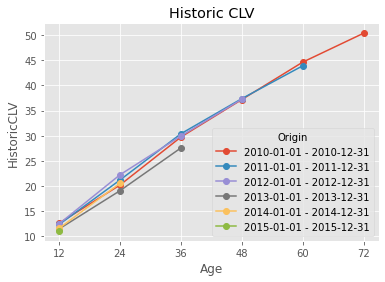

In [82]:
#line chart
plt.style.use("ggplot")
for i in range(len(df_hCLV)):
  data = df_hCLV.iloc[i]
  plt.plot(data, 'o-', label = data.name)
plt.legend(title="Origin")
# plt.grid()
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.title('Historic CLV')
plt.show()

In [148]:
#calculate volume-weighted average Amount group by Age

df_weighted = df_newCustomer * df_hCLV
sum_hCLV_by_age = df_weighted.sum(axis=0) 
sum_customer_by_age = df_newCustomer.sum(axis=0)
weighted_avg = sum_hCLV_by_age / sum_customer_by_age

df_weighted_avg = weighted_avg.to_frame(name = "HistoricCLV")
df_weighted_avg.index.name = 'Age'
df_weighted_avg = df_weighted_avg.round(decimals = 2)
df_weighted_avg

,HistoricCLV
Age,
12,11.93
24,20.61
36,29.36
48,37.26
60,44.26
72,50.37


#### Answer:

|Age|HistoricCLV|
|---|---|
|12|11\.93|
|24|20\.61|
|36|29\.36|
|48|37\.26|
|60|44\.26|
|72|50\.37|

### Step 7: Interpreting your results 

1.How much have customers acquired in 2011 spent to date?

Answer:  
Customers acquired in 2011 have spent $43.90 to date.

2.Do each group of customers exhibit similar or different patterns of spending? What’s the
implication for the business?

Answer:  
Each group of customers exhibit similar patterns of spending as shown in the Historic CLV plot above.
It implicates that it should give us confidence in assuming $50.37 is a decent lower bound on CLV.